# **Neural Network Type Classification using TMNIST dataset**

TMNIST stands for 'Typogrphy Modified National Institute of Standards and Technology'. 

The dataset consists of 94 alpha-numeric characters as given below:     
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']

# Abstract

The aim of this excercise is to execute character identification on a 94 character TMINST kaggle dataset through deep learning techniques. The character determining technique we are using here is called CNN, stands for Convolutional Neural Network. Based on the character identification we will be judge on the accuracy then.

CNN is a type of deep neural network and is generally used for image classification and recognition tasks. Unlike traditional neural networks, which are fully connected, CNN uses convolutional layers to extract local features from images. These layers use filters/kernels to perform convolutions on the input image, effectively highlighting important features such as edges, shapes, and textures. The outputs from these convolutional layers are then passed through pooling layers, which reduce the spatial dimensions of the feature maps, allowing the network to learn more efficiently. 

Finally, the resulting feature maps are flattened and passed through one or more fully connected layers to produce the final classification output.

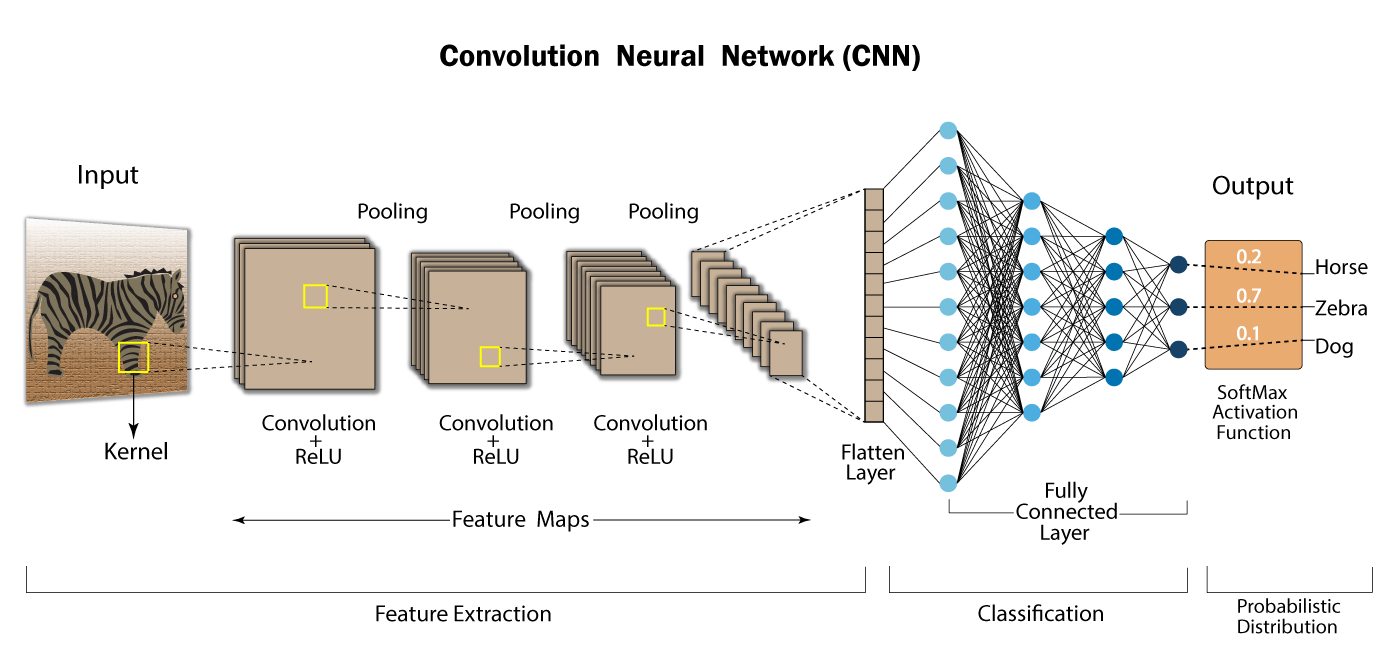

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


# Importing libraries

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

# Data Collection
The dataset has been collected from Kaggle open datasets containing Typography MNIST (TMNIST) with 94 characters and over 274K images
(https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters?resource=download)

In [3]:
# loading data in a pandas dataframe
data = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# displaying distinct labels and total distinct count
print(data['labels'].unique())
print(len(data['labels'].unique()))

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
94


Given above are the 94 lables that exist in the dataset with respective image data to predict the labels

# Data Preparation
Preprocessing the dataset to normalize the image size, color space, and image quality. Encode the required categorical columns, further split the dataset into training and testing sets.

**Splitting input and desired target data**

In [5]:
y = data['labels']
X = data.drop(['labels','names'], axis = 1)

In [6]:
# creating dictionary of values and their respective labels
labels = data['labels'].unique()
values = [num for num in range(len(data['labels'].unique()))]
dict_value_label = dict(zip(values,labels))
dict_label_value = dict(zip(labels,values))

Now that the data is splitted into labels and input, let's check for few cases how the imput image looks like

AxesImage(80,52.8;496x369.6)


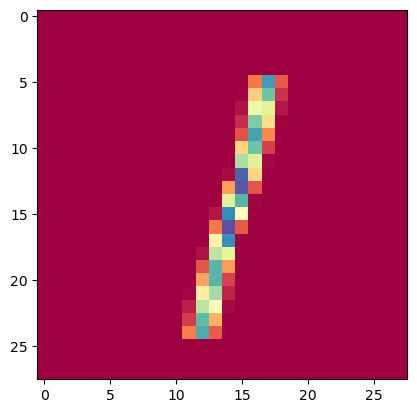

In [7]:
print(plt.imshow(X.values[3].reshape(28,28), cmap=plt.get_cmap('Spectral')))

This one could be '1' or '/', as it resembles a straight line. Let's check it's label.

In [8]:
print(y[3])

/


As expected, it turns out to be '/'. But it may not be this easy for every character, hence we need image identification throguh convolutional neural network.

Below, we can see few more cases of images and their respective labels above each image.

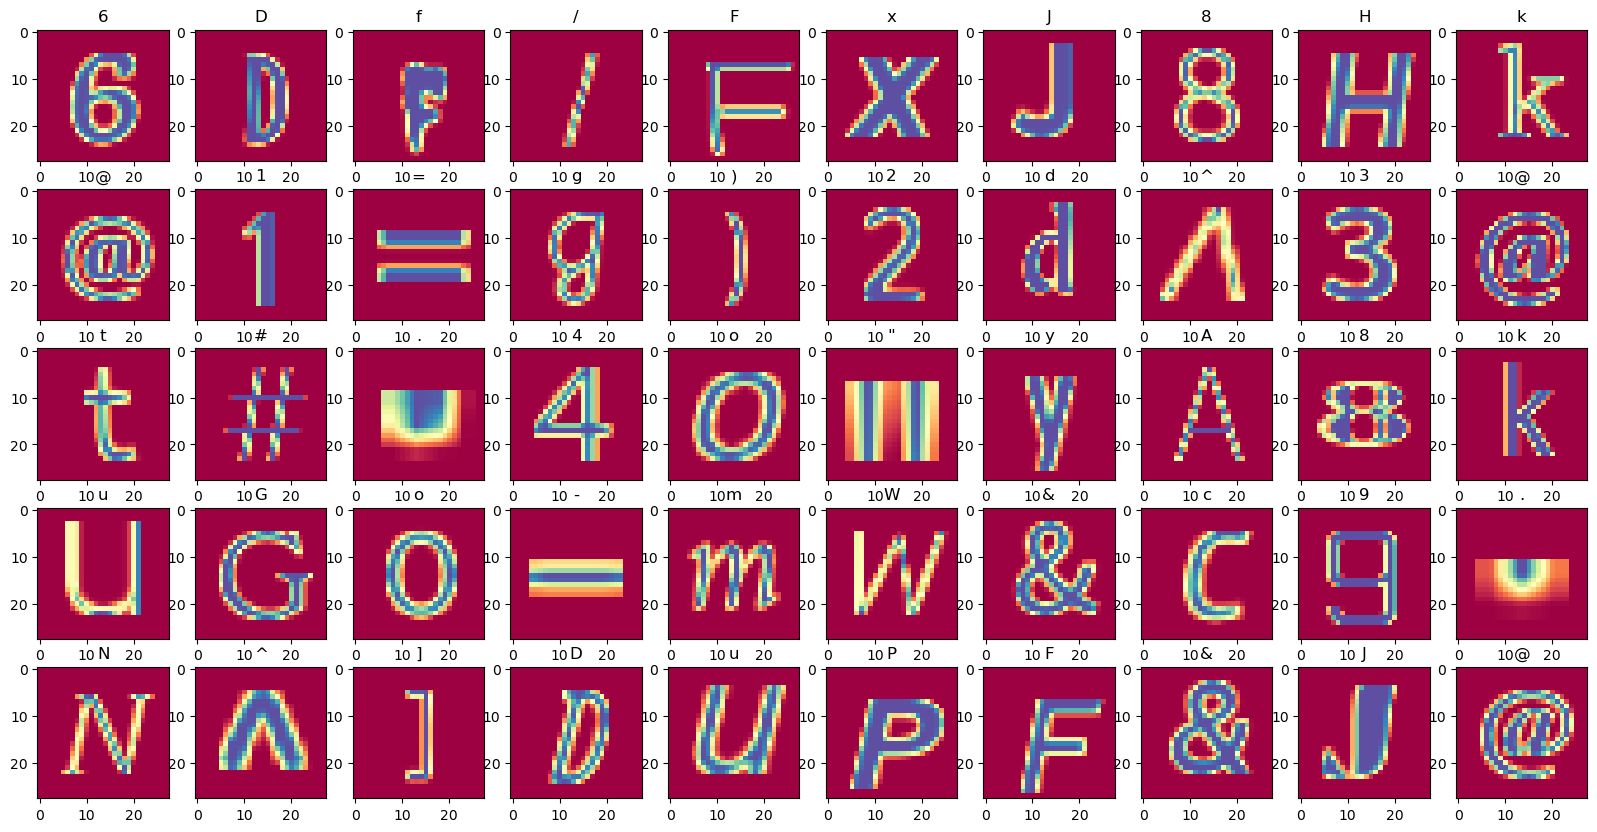

In [9]:
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(20,10))
for i in range(50):  
    plt.subplot(5,10,i+1)
    plt.title(y.iloc[i])
    plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('Spectral'))
plt.show()

**Train-Test Split**

Now we will split the input images and labels into test and train datasets at 80:20 ratio.

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [11]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
198215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y_train.head()

198215    :
41087     ,
165138    x
177019    q
72101     c
Name: labels, dtype: object

In [13]:
y_test.head()

86512     &
251935    '
136848    i
188895    v
173187    /
Name: labels, dtype: object

**Performing OneHot Encoding**

One-hot encoding is a technique used in machine learning to represent categorical data as numerical data. It works by converting categorical data into a binary vector of zeros and ones, where each element in the vector represents a possible value of the categorical variable.

In [14]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1,1))
y_test = enc.fit_transform(y_test.values.reshape(-1,1))
y_train,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

Now, we will transform the flattened image data to a 2D array with dimensions of 28 by 28 and single color scale. Further we normalize the test and train image data by divinding it to 255, as the max RGB codes go to 255 only.

In [15]:
# converting the flattened representation back into a 2D array with dimensions 28 X 28 with 1 color
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)

# normalizing the train and test dataset and bringing tis range from 0 to 1 by dividing the code by 255
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (219274, 28, 28, 1)
X_test shape: (54819, 28, 28, 1)


# Building the CNN Model
Designing the architecture of the CNN model with a convolutional layer, two pooling layers, and two fully connected layers. The convolutional layers extract the features from the input image, while the pooling layers reduce the dimensionality of the feature maps. The fully connected layers classify the features into output categories.

In [16]:
# Convolutional model
model = Sequential()

# building convolutional layer 1
model.add(Convolution2D(64, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

# building convolutional layer 2
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

# building convolutional layer 3
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# fully connected layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# fully connected layer 2
no_of_classes=data['labels'].nunique()
model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

# Training the Model
Training the CNN model using the training dataset. The model learns the features and relationships between the input images and the output categories. The training process involves minimizing the error between the predicted output and the actual output.

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1)

Epoch 1/100


2023-04-17 00:57:17.280850: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1714/1714 [==============================] - 20s 7ms/step - loss: 0.8741 - accuracy: 0.7528 - val_loss: 0.3524 - val_accuracy: 0.8858
Epoch 2/100
1714/1714 [==============================] - 12s 7ms/step - loss: 0.4157 - accuracy: 0.8683 - val_loss: 0.2846 - val_accuracy: 0.9091
Epoch 3/100
1714/1714 [==============================] - 11s 7ms/step - loss: 0.3499 - accuracy: 0.8902 - val_loss: 0.2469 - val_accuracy: 0.9221
Epoch 4/100
1714/1714 [==============================] - 11s 7ms/step - loss: 0.3158 - accuracy: 0.9001 - val_loss: 0.2288 - val_accuracy: 0.9264
Epoch 5/100
1714/1714 [==============================] - 12s 7ms/step - loss: 0.2950 - accuracy: 0.9056 - val_loss: 0.2236 - val_accuracy: 0.9279
Epoch 6/100
1714/1714 [==============================] - 11s 7ms/step - loss: 0.2831 - accuracy: 0.9096 - val_loss: 0.2160 - val_accuracy: 0.9301
Epoch 7/100
1714/1714 [==============================] - 12s 7ms/step - loss: 0.2753 - accuracy: 0.9118 - val_loss: 0.2142 - val_accurac

# Evaluating the Model
Evaluating the performance of the CNN model using the test dataset as validation dataset. Monitor the accuracy, and loss of the model. If the model is not performing well, we need to adjust the hyperparameters or modify the architecture.

In [18]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print(f'\nSummary: \n\tLoss over the test dataset: {round(evaluation[0],2)} \n\tAccuracy: {round(evaluation[1]*100,2)}%')

429/429 [==============================] - 1s 3ms/step - loss: 0.1810 - accuracy: 0.9430

Summary: 
	Loss over the test dataset: 0.18 
	Accuracy: 94.3%


Let's create loss vs epoch and accuracy vs epoch graphs to monitor the performance of CNN during training. These graphs provide valuable insights into how the model is learning and improving over time, and can help us identify potential problems or areas for improvement.

**Accuracy vs epoch:** Accuracy is a measure of how well the CNN is able to correctly classify the images in the test set. During training, we monitor the accuracy of the model on the training set and the validation set. Plotting the accuracy vs epoch graph allows us to see how the accuracy increases over time as the CNN learns. If the accuracy is not increasing or is decreasing on the validation set, it can indicate that the CNN is overfitting to the training data.

**Loss vs epoch:** Loss is a measure of how well the CNN is able to predict the correct class label for each image. During training, the CNN tries to minimize this loss by adjusting its weights and biases. Plotting the loss vs epoch graph allows us to see how the loss decreases over time as the CNN learns. If the loss is not decreasing or is increasing, it can indicate that the CNN is not learning or is overfitting to the training data.

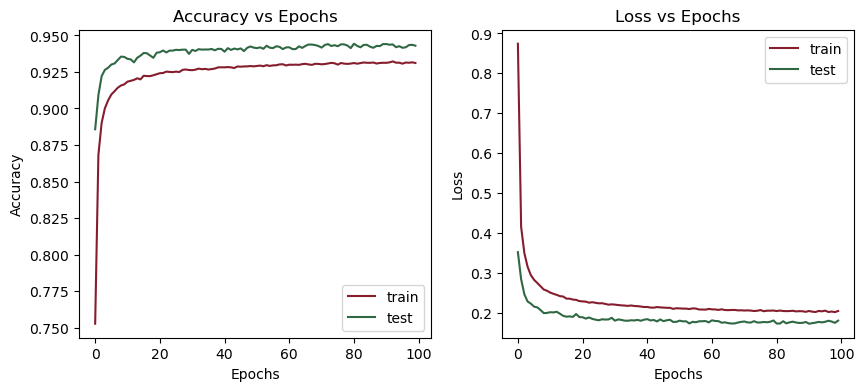

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
epochs=np.arange(100)

plt.title('Accuracy vs Epochs')
plt.plot(epochs,history.history['accuracy'],label='train', color='#851D2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,history.history['loss'],label='train', color='#851D2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs,history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

We can see from the plots above that the accuracy is gradually increasing as the model gets trained, at the same time the loss in predicting the correct class seems to gradually reduce.

# Predicting with trained Model
Predicting images on CNN model using the testing dataset.

In [20]:
y_pred = model.predict(X_test)

1714/1714 [==============================] - 3s 2ms/step


We have now predicted the image labels with an accuracy of 94.35%. The evaluation can be seen above.

# Conclusion
We have successfully fit the CNN deep learning model on TMNIST 94-characters dataset and executed the Image Recognition on all the images. The modes was able to identify 95% of the images accurately.

# Lessons Learnt
1. Understood the architecture of CNN and how the dataset gets trained over the model
2. Got hands on experience of programming a CNN model
3. Gained knowledge on interpretation of Accuracy & Loss curves against Epoch value

# References
1. https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
2. https://www.kaggle.com/code/chakrabortyarnab/getting-started-with-convnets
3. https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy/notebook
4. https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392